In [16]:
# This cell is to import needed libraries/packages and datasets. 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#Datasets have been cleaned in previous notebooks.

#df_whole is a copy of the original Data frame, with large amounts of cleaning and parsing to allow for plotting.
df_whole = pd.read_csv("df_whole.csv")
#df_lang is a dataframe modified from df_whole, the answer to the languages used question have been exploaded out to get counts per mention.
df_lang = pd.read_csv("df_lang.csv")
#df_whole_45 is a subset of the original data frame that only includes the top 45 countries by participation.
df_whole_45 = pd.read_csv('df_whole_45.csv')
#df_45 is a new data frame created from df_whole_45 that has means, medians and participation counts for categories grouped by country.
df_45 = pd.read_csv("df_45_clean.csv")
#df_salary_test is a copy of df_whole_45
df_salary_test = pd.read_csv('df_salary_test.csv')

#df is the original df.
df = pd.read_csv('data/survey_results_public.csv')

In [17]:
df_whole_45.columns

Index(['MainBranch', 'Employment', 'RemoteWork', 'CodingActivities', 'EdLevel',
       'LearnCode', 'LearnCodeOnline', 'LearnCodeCoursesCert', 'YearsCode',
       'YearsCodePro', 'DevType', 'OrgSize', 'PurchaseInfluence', 'BuyNewTool',
       'Country', 'Currency', 'CompTotal', 'CompFreq',
       'LanguageHaveWorkedWith', 'LanguageWantToWorkWith',
       'DatabaseHaveWorkedWith', 'DatabaseWantToWorkWith',
       'PlatformHaveWorkedWith', 'PlatformWantToWorkWith',
       'WebframeHaveWorkedWith', 'WebframeWantToWorkWith',
       'MiscTechHaveWorkedWith', 'MiscTechWantToWorkWith',
       'ToolsTechHaveWorkedWith', 'ToolsTechWantToWorkWith',
       'NEWCollabToolsHaveWorkedWith', 'NEWCollabToolsWantToWorkWith',
       'OpSysProfessional use', 'OpSysPersonal use', 'VersionControlSystem',
       'VCInteraction', 'VCHostingPersonal use', 'VCHostingProfessional use',
       'OfficeStackAsyncHaveWorkedWith', 'OfficeStackAsyncWantToWorkWith',
       'OfficeStackSyncHaveWorkedWith', 'OfficeStack

In [55]:
#df['CompTotal'].value_counts()
#string_rows = df.loc[df['CompTotal'].apply(lambda x: isinstance(x, str))]
#string_rows



# make filters
## Drop rows with zero values in 'CompTotal' column
df_salary_test = df_salary_test[df_salary_test['CompTotal'] != 0]

low_rows = df_salary_test[df_salary_test['YearlyTotConvertCOMP'] < 500]
high_rows = df_salary_test[df_salary_test['YearlyTotConvertCOMP'] > 1000000]

# Exclude rows with NaN values in 'YearlyTotConvertCOMP' column
df_salary_test_filtered = df_salary_test.dropna(subset=['YearlyTotConvertCOMP']) #comment out this line to see NANs

# make columns for new df
##grouped_low = low_rows.groupby('Country').size().rename('Low')
##grouped_high = high_rows.groupby('Country').size().rename('High')
##grouped_total = df_salary_test_filtered.groupby('Country').size().rename('Total') #comment out this line to see NANs

# Below if you want to see it with the NAN counts included
#grouped_total = df_salary_test.groupby('Country').size().rename('Total')

# Combine the counts into a single DataFrame
combined_df = pd.concat([grouped_low, grouped_high, grouped_total], axis=1)

# Calculate the percentage of low values
combined_df['% low'] = combined_df['Low'] / combined_df['Total'] * 100

# Calculate the percentage of low values
combined_df['% High'] = combined_df['High'] / combined_df['Total'] * 100

# Output the combined DataFrame
combined_df

# Group by 'Country' and calculate value counts for 'CompFreq'
country_grp = df_salary_test_filtered.groupby('Country')
counts = country_grp['CompFreq'].value_counts(normalize = True)* 100
counts

# Unpack the Series using unstack()
unstacked_counts = counts.unstack()

# Output the unpacked DataFrame
unstacked_counts

Sal_eval_df = pd.concat([combined_df, unstacked_counts], axis=1)

Sal_eval_df

# Group by 'Country' and calculate mean salary for each response category
mean_salary_by_frequency = df_salary_test_filtered.groupby(['Country', 'CompFreq'])['YearlyTotConvertCOMP'].mean()

# Unpack the mean salary values and add them to Sal_eval_df
Sal_eval_df['MeanSalaryMonthly'] = mean_salary_by_frequency.unstack()['Monthly']
Sal_eval_df['MeanSalaryWeekly'] = mean_salary_by_frequency.unstack()['Weekly']
Sal_eval_df['MeanSalaryYearly'] = mean_salary_by_frequency.unstack()['Yearly']

Sal_eval_df

# After I have removed these values, I will need to update all data frames and check that my annalysis has not changed. 
# This I can make the box and whisker visulization for the DF_45 DF, and move on from the salary analysis to the mental health and devops section

,Low,High,Total,% low,% High,Monthly,Weekly,Yearly,MeanSalaryMonthly,MeanSalaryWeekly,MeanSalaryYearly
Country,,,,,,,,,,,
Argentina,12.0,1.0,280,4.285714,0.357143,86.428571,1.071429,12.500000,3.457929e+04,1.040000e+05,57624.878157
Bangladesh,8.0,NaN,213,3.755869,NaN,84.976526,2.816901,12.206573,1.351619e+04,1.429807e+04,29289.092396
Belgium,1.0,1.0,345,0.289855,0.289855,65.507246,2.028986,32.463768,7.248413e+04,1.424209e+05,85753.168203
Brazil,8.0,4.0,1287,0.621601,0.310800,78.399378,1.554002,20.046620,3.842829e+04,8.511906e+04,62806.154652
Canada,2.0,56.0,1481,0.135044,3.781229,5.941931,3.376097,90.681972,5.703094e+05,2.819935e+06,97815.411341
China,6.0,NaN,163,3.680982,NaN,54.601227,1.840491,43.558282,4.153092e+04,7.090543e+04,88196.889121
Colombia,18.0,NaN,210,8.571429,NaN,86.190476,0.952381,12.857143,3.286716e+04,1.325956e+05,41496.503396
Czech Republic,3.0,NaN,353,0.849858,NaN,84.702550,0.566572,14.730878,5.957232e+04,6.357708e+04,66490.268087
Egypt,7.0,NaN,125,5.600000,NaN,92.000000,1.600000,6.400000,1.190044e+04,8.582524e+03,40087.812663


In [32]:
mean_salary_by_frequency['Portugal']

CompFreq
Monthly     89442.184173
Weekly      54478.853047
Yearly     298741.519124
Name: YearlyTotConvertCOMP, dtype: float64

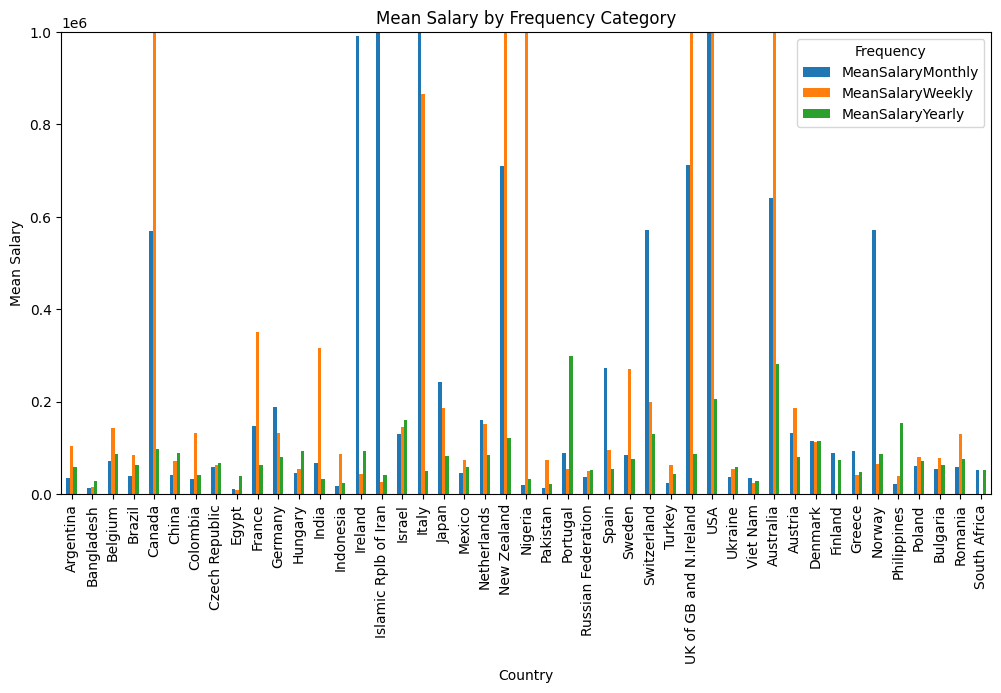

In [43]:


# Select the relevant columns from Sal_eval_df
mean_salary_data = Sal_eval_df[['MeanSalaryMonthly', 'MeanSalaryWeekly', 'MeanSalaryYearly']].copy()

# Plot the mean salary for each frequency category
#mean_salary_data.plot(kind='bar', figsize=(12, 6))
ax = mean_salary_data.plot(kind='bar', figsize=(12, 6))
plt.xlabel('Country')
plt.ylabel('Mean Salary')
plt.title('Mean Salary by Frequency Category')
plt.legend(title='Frequency', loc='upper right')

# Set the y-axis limits to zoom in on the good data
ax.set_ylim(0, 1000000)  # Adjust the limits as per your preference

plt.show()

need to remove any data points in **df_salary_test_filtered** where **'YearlyTotConvertCOMP'** for listed **'Country'** is 2.5 times larger than the **'MeanSalaryYearly'** for that **'country' in **mean_salary_data** df...then replot the above to see if the averages seem more grouped.

,MeanSalaryMonthly,MeanSalaryWeekly,MeanSalaryYearly


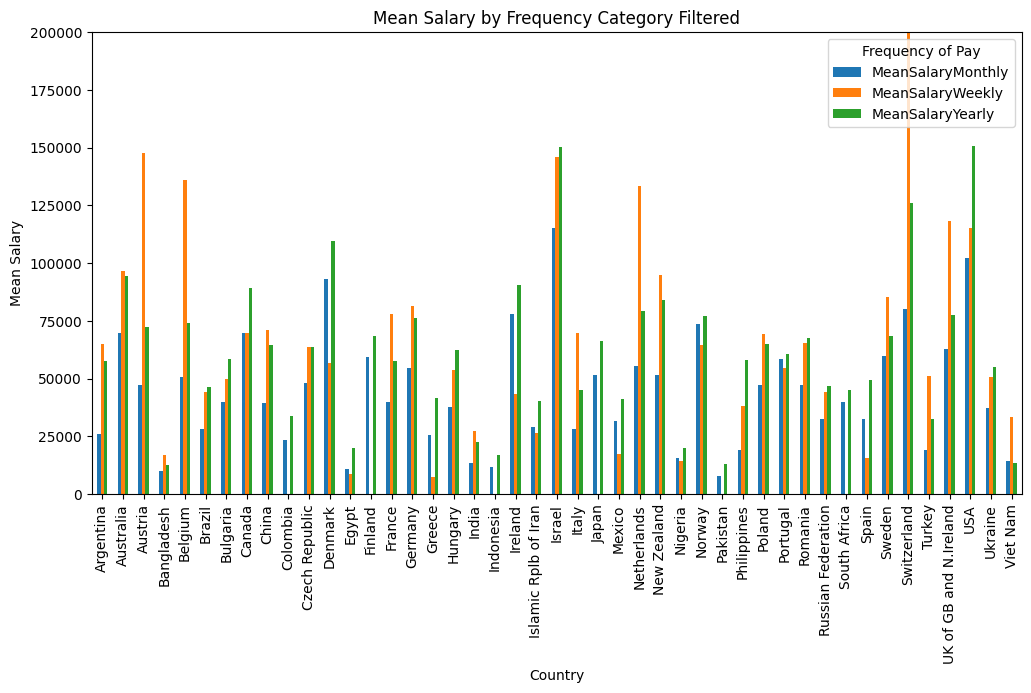

In [57]:
# filtering out the outliers

# Merge the two DataFrames on the 'Country' column
merged_salary_data = df_salary_test_filtered.merge(mean_salary_data, left_on='Country', right_index=True)
##display(mean_salary_data)
#Shape prior to (34811, 83)
#display(merged_salary_data.shape) 
# Create a boolean mask based on the condition
mask = (merged_salary_data['YearlyTotConvertCOMP'] > (2 * merged_salary_data['MeanSalaryYearly'])) | (merged_salary_data['YearlyTotConvertCOMP'] < merged_salary_data['MeanSalaryYearly'] / 50)

# Apply the mask to filter out the undesired data points
df_salary_test_filtered_filtered = df_salary_test_filtered[~df_salary_test_filtered.index.isin(merged_salary_data[mask].index)]

# Print the filtered DataFrame
#display(df_salary_test_filtered_filtered)
#display(df_salary_test_filtered_filtered) 
# removing the high outliers shape was (31953, 80), after removing low outliers shape was (31624, 80)

# Group by 'Country' and calculate mean salary for each response category
mean_salary_by_frequency_filtered = df_salary_test_filtered_filtered.groupby(['Country', 'CompFreq'])['YearlyTotConvertCOMP'].mean()

# Create the Sal_eval_df_filtered DataFrame, with column names
Sal_eval_df_filtered = pd.DataFrame(columns=['MeanSalaryMonthly', 'MeanSalaryWeekly', 'MeanSalaryYearly'])

# Unpack the mean salary values and add them to Sal_eval_df
Sal_eval_df_filtered['MeanSalaryMonthly'] = mean_salary_by_frequency_filtered.unstack()['Monthly']
Sal_eval_df_filtered['MeanSalaryWeekly'] = mean_salary_by_frequency_filtered.unstack()['Weekly']
Sal_eval_df_filtered['MeanSalaryYearly'] = mean_salary_by_frequency_filtered.unstack()['Yearly']

#display(Sal_eval_df_filtered)

# Plot the mean salary for each frequency category
#mean_salary_data.plot(kind='bar', figsize=(12, 6))
ax = Sal_eval_df_filtered.plot(kind='bar', figsize=(12, 6))
plt.xlabel('Country')
plt.ylabel('Mean Salary')
plt.title('Mean Salary by Frequency Category Filtered')
plt.legend(title='Frequency of Pay', loc='upper right')

# Set the y-axis limits to zoom in on the good data
ax.set_ylim(0, 200000)  # Adjust the limits as per your preference

plt.show()

# Please note: 
Please note that the exploration of pay frequency and its effects on salary is documented below this cell. While I have decided to keep this information for future reference and personal reflection, it is not essential for the reporting purpose at hand. The significant finding, supported by visual evidence above, is that the rows with weekly and monthly pay frequencies were more prone to containing erroneous data. 

In [21]:
df_salary_test['YearlyTotConvertCOMP']
sorted_df = df_salary_test.sort_values('YearlyTotConvertCOMP')
sorted_df

,MainBranch,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,LearnCodeCoursesCert,YearsCode,YearsCodePro,...,Onboarding,ProfessionalTech,TrueFalse_1,TrueFalse_2,TrueFalse_3,SurveyLength,SurveyEase,ConvertedCompYearly,CurrencyConvert,YearlyTotConvertCOMP
28635,I am a developer by profession,"Employed, part-time",Full in-person,Freelance/contract work,Primary/elementary school,Colleague,NaN,NaN,3.0,2,...,NaN,NaN,NaN,NaN,NaN,Too short,Neither easy nor difficult,NaN,14959.00,0.000134
45633,"I am not primarily a developer, but I write co...","Independent contractor, freelancer, or self-em...",Fully remote,School or academic work,"Professional degree (JD, MD, etc.)","Other online resources (e.g., videos, blogs, f...",Technical documentation;Video-based Online Cou...,Other,2.0,2,...,Somewhat long,None of these,No,Yes,Yes,Appropriate in length,Easy,NaN,4584.75,0.002617
14701,I am a developer by profession,"Employed, full-time","Hybrid (some remote, some in-person)",I don’t code outside of work,"Associate degree (A.A., A.S., etc.)","Other online resources (e.g., videos, blogs, f...",Technical documentation;Written Tutorials;Codi...,Udemy,16.0,14,...,Just right,DevOps function;Continuous integration (CI) an...,Yes,No,Yes,Appropriate in length,Easy,NaN,14959.00,0.016044
33004,I am a developer by profession,"Employed, full-time",Fully remote,Bootstrapping a business,Bachelor’s,"Other online resources (e.g., videos, blogs, f...",Technical documentation;Stack Overflow;Video-b...,Other,7.0,2,...,NaN,NaN,NaN,NaN,NaN,Too long,Neither easy nor difficult,NaN,14959.00,0.044121
58338,I am a developer by profession,"Employed, full-time",Full in-person,Hobby;Other (please specify):,Master’s,Other (please specify):,NaN,NaN,1.0,1,...,Just right,DevOps function,Yes,NaN,NaN,Too long,Easy,NaN,23467.50,0.044317
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63984,I am learning to code,"Student, full-time",NaN,NaN,"Secondary school (e.g. American high school, G...",Books / Physical media;Other online resources ...,Technical documentation;Blogs;Written Tutorial...,NaN,7.0,NaN,...,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN,NaN
63987,I am a developer by profession,"Employed, full-time;Student, part-time","Hybrid (some remote, some in-person)",School or academic work,Bachelor’s,"School (i.e., University, College, etc)",NaN,NaN,8.0,NaN,...,Very long,DevOps function;Developer portal or other cent...,No,No,Yes,Appropriate in length,Easy,NaN,NaN,NaN
63989,I am learning to code,"Student, full-time;Employed, part-time","Hybrid (some remote, some in-person)",School or academic work,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Written Tutorials;Stac...,NaN,4.0,NaN,...,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Neither easy nor difficult,NaN,NaN,NaN
63992,"I am not primarily a developer, but I write co...","Employed, full-time","Hybrid (some remote, some in-person)",Hobby;School or academic work,Bachelor’s,Books / Physical media;Other online resources ...,Technical documentation;Programming Games;Stac...,Udemy;Codecademy;Pluralsight;edX,42.0,33,...,Just right,None of these,No,No,No,Appropriate in length,Easy,NaN,1.00,NaN


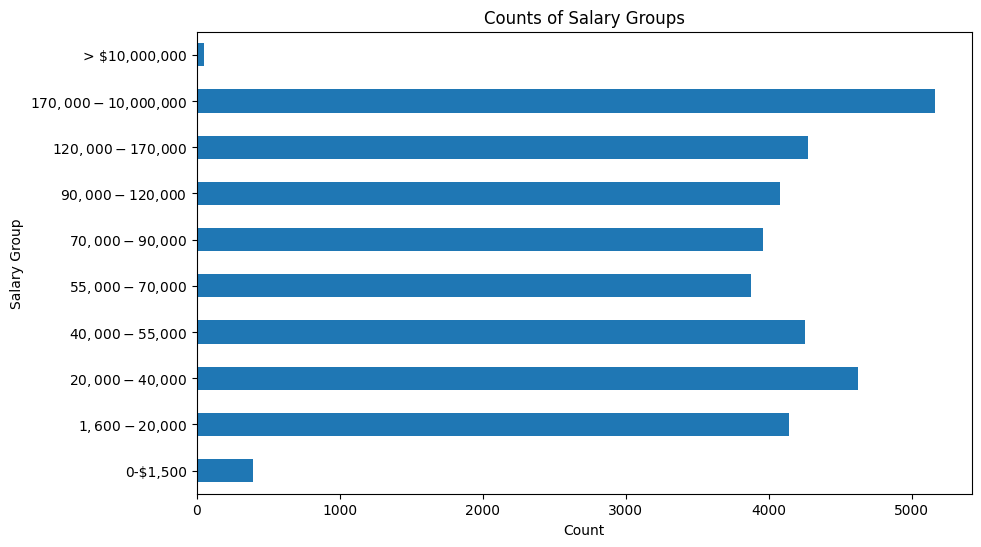

In [22]:


#'YearlyTotConvertCOMP'
#'ConvertedCompYearly'

# Define the salary groups and their corresponding labels
#salary_groups = [0, 1500, 20000, 40000, 55000, 70000, 90000, 120000, 170000, 10000000, float('inf')]

salary_groups = [0, 1500, 20000,  40000, 55000, 70000, 90000, 120000, 170000, 10000000, float('inf')]
labels = ['0-$1,500', '$1,600-$20,000', '$20,000-$40,000', '$40,000-$55,000', '$55,000-$70,000', '$70,000-$90,000', '$90,000-$120,000', '$120,000-$170,000', '$170,000-$10,000,000', '> $10,000,000']

# Populate the 'SalaryGroup' column based on salary ranges
df_salary_test['SalaryGroup'] = pd.cut(df_salary_test['YearlyTotConvertCOMP'], bins=salary_groups, labels=labels, right=False)

# Calculate the counts for each salary group
group_counts = df_salary_test['SalaryGroup'].value_counts()

# Reorder the counts based on the provided labels
group_counts = group_counts.reindex(labels)

# Create a horizontal bar chart using matplotlib
plt.figure(figsize=(10, 6))
group_counts.plot(kind='barh')
plt.xlabel('Count')
plt.ylabel('Salary Group')
plt.title('Counts of Salary Groups')
plt.show()





In [23]:
# Calculate the counts for each salary group
group_counts = df_salary_test['SalaryGroup'].value_counts()

# Print the counts for each group
for label, count in zip(labels, group_counts):
    print(f'{label}: {count}')
    
    
    

0-$1,500: 5161
$1,600-$20,000: 4623
$20,000-$40,000: 4275
$40,000-$55,000: 4253
$55,000-$70,000: 4143
$70,000-$90,000: 4081
$90,000-$120,000: 3961
$120,000-$170,000: 3872
$170,000-$10,000,000: 395
> $10,000,000: 47


In [24]:
print(df_salary_test.groupby('SalaryGroup').size().sum())
print(df_salary_test['YearlyTotConvertCOMP'].count())
zero_entries = df_salary_test[df_whole_45['YearlyTotConvertCOMP'] == 0.0]

zero_entries

34811
34811


C:\Users\Adison\AppData\Local\Temp\ipykernel_10976\2225688425.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  zero_entries = df_salary_test[df_whole_45['YearlyTotConvertCOMP'] == 0.0]


,MainBranch,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,LearnCodeCoursesCert,YearsCode,YearsCodePro,...,ProfessionalTech,TrueFalse_1,TrueFalse_2,TrueFalse_3,SurveyLength,SurveyEase,ConvertedCompYearly,CurrencyConvert,YearlyTotConvertCOMP,SalaryGroup
373,I code primarily as a hobby,"Employed, full-time",Full in-person,Hobby,Master’s,"Friend or family member;School (i.e., Universi...",NaN,NaN,10.0,NaN,...,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN,NaN,NaN
1081,I am a developer by profession,"Employed, full-time",Fully remote,Hobby;Contribute to open-source projects,Master’s,"Other online resources (e.g., videos, blogs, f...",Blogs;Written Tutorials;Stack Overflow;Online ...,NaN,4.0,2,...,DevOps function;Microservices;Developer portal...,Yes,Yes,Yes,Appropriate in length,Easy,151000.0,1.00,151000.000000,"$120,000-$170,000"
3274,"I am not primarily a developer, but I write co...","Employed, full-time","Hybrid (some remote, some in-person)",Hobby;Contribute to open-source projects;Freel...,"Other doctoral degree (Ph.D., Ed.D., etc.)",Books / Physical media,NaN,NaN,29.0,29,...,Developer portal or other central places to fi...,No,No,Yes,Appropriate in length,Neither easy nor difficult,NaN,0.93,NaN,NaN
3636,I am a developer by profession,"Employed, full-time;Independent contractor, fr...",Fully remote,Hobby;Freelance/contract work,Master’s,Books / Physical media;Friend or family member...,Technical documentation;Blogs;Written Tutorial...,Pluralsight;edX,25.0,17,...,DevOps function;Developer portal or other cent...,Yes,Yes,Yes,Appropriate in length,Neither easy nor difficult,60000.0,1.00,60000.000000,"$55,000-$70,000"
7076,I am a developer by profession,"Employed, full-time",Fully remote,Hobby,Bachelor’s,"Other online resources (e.g., videos, blogs, f...",Technical documentation;Video-based Online Cou...,NaN,0.0,Less than 1 year,...,NaN,NaN,Yes,No,Appropriate in length,Easy,NaN,82.31,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56820,I am a developer by profession,"Employed, full-time",Fully remote,I don’t code outside of work,Bachelor’s,Books / Physical media;Other online resources ...,Technical documentation;Blogs;Stack Overflow;H...,NaN,22.0,11,...,NaN,NaN,NaN,NaN,Appropriate in length,Easy,209000.0,1.00,209000.000000,"$170,000-$10,000,000"
59332,I code primarily as a hobby,"Student, full-time",NaN,NaN,"Secondary school (e.g. American high school, G...",Books / Physical media,NaN,NaN,10.0,NaN,...,NaN,NaN,NaN,NaN,Appropriate in length,Neither easy nor difficult,NaN,NaN,NaN,NaN
59997,I code primarily as a hobby,"Independent contractor, freelancer, or self-em...",Full in-person,Hobby,Bachelor’s,Books / Physical media;Other online resources ...,Technical documentation;Written Tutorials;Stac...,NaN,5.0,NaN,...,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN,NaN,NaN
60689,I am a developer by profession,"Employed, full-time",Full in-person,School or academic work,Bachelor’s,Books / Physical media;Other online resources ...,Technical documentation;Written Tutorials;Stac...,NaN,8.0,7,...,NaN,No,Yes,No,Appropriate in length,Neither easy nor difficult,45720.0,80.20,32917.705736,"$20,000-$40,000"


In [25]:
desired_group_entries = df_salary_test[df_salary_test['SalaryGroup'] == '> $10,000,000']
desired_columns = ['Employment', 'EdLevel', 'Country', 'Currency', 'CompTotal', 'CompFreq', 'Age', 'Gender', 'SurveyEase', 'ConvertedCompYearly', 'CurrencyConvert', 'YearlyTotConvertCOMP', 'SalaryGroup']
desired_group_entries_filtered = desired_group_entries[desired_columns]

# Print the filtered entries for the desired columns
desired_group_entries_filtered.head(45)

# Print the entries for the desired group
#print(desired_group_entries)

,Employment,EdLevel,Country,Currency,CompTotal,CompFreq,Age,Gender,SurveyEase,ConvertedCompYearly,CurrencyConvert,YearlyTotConvertCOMP,SalaryGroup
176,"Employed, full-time",Bachelor’s,Portugal,EUR,4.200004e+07,Yearly,29.5,Woman,Neither easy nor difficult,44790396.0,0.93,4.516134e+07,"> $10,000,000"
1210,"Employed, full-time","Other doctoral degree (Ph.D., Ed.D., etc.)",USA,USD,3.000000e+05,Weekly,39.5,Man,Easy,15000000.0,1.00,1.560000e+07,"> $10,000,000"
1369,"Employed, full-time",Master’s,USA,USD,2.200000e+05,Weekly,21.0,Man,Neither easy nor difficult,11000000.0,1.00,1.144000e+07,"> $10,000,000"
1682,"Employed, full-time",Bachelor’s,USA,USD,2.500000e+05,Weekly,39.5,Man,Neither easy nor difficult,12500000.0,1.00,1.300000e+07,"> $10,000,000"
1771,"Independent contractor, freelancer, or self-em...",Bachelor’s,USA,USD,1.200000e+07,Yearly,39.5,Man,Easy,12000000.0,1.00,1.200000e+07,"> $10,000,000"
2722,"Employed, full-time",Master’s,USA,USD,2.500000e+05,Weekly,49.5,Man,Easy,12500000.0,1.00,1.300000e+07,"> $10,000,000"
2746,"Employed, full-time",Some college,USA,USD,1.990000e+05,Weekly,39.5,Man,Easy,9950000.0,1.00,1.034800e+07,"> $10,000,000"
2891,"Employed, full-time",Bachelor’s,USA,USD,1.000000e+52,Weekly,21.0,Man,Difficult,NaN,1.00,5.200000e+53,"> $10,000,000"
3078,I prefer not to say,Something else,USA,USD,1.950000e+05,Weekly,39.5,Man,Easy,9750000.0,1.00,1.014000e+07,"> $10,000,000"
7467,"Employed, full-time",Some college,USA,USD,2.800000e+05,Weekly,29.5,Man,Easy,14000000.0,1.00,1.456000e+07,"> $10,000,000"


In [26]:
compfreq_counts = desired_group_entries['CompFreq'].value_counts()

# Print the value counts for the 'CompFreq' column
print(compfreq_counts)

Weekly     39
Yearly      5
Monthly     3
Name: CompFreq, dtype: int64


In [27]:
desired_group_entries_yearly = desired_group_entries[desired_group_entries['CompFreq'] == 'Yearly']

# Print the entries with 'CompFreq' as 'Yearly'
desired_group_entries_yearly[desired_columns]

,Employment,EdLevel,Country,Currency,CompTotal,CompFreq,Age,Gender,SurveyEase,ConvertedCompYearly,CurrencyConvert,YearlyTotConvertCOMP,SalaryGroup
176,"Employed, full-time",Bachelor’s,Portugal,EUR,42000044.0,Yearly,29.5,Woman,Neither easy nor difficult,44790396.0,0.93,4.516134e+07,"> $10,000,000"
1771,"Independent contractor, freelancer, or self-em...",Bachelor’s,USA,USD,12000000.0,Yearly,39.5,Man,Easy,12000000.0,1.00,1.200000e+07,"> $10,000,000"
16206,"Employed, full-time",Bachelor’s,Australia,AUD,200000000.0,Yearly,55.9,"Non-binary, genderqueer, or gender non-conforming",Easy,NaN,1.50,1.333333e+08,"> $10,000,000"
39482,"Employed, full-time",Some college,USA,USD,150800000.0,Yearly,39.5,Man,Easy,NaN,1.00,1.508000e+08,"> $10,000,000"
54476,"Employed, full-time;Independent contractor, fr...",Master’s,USA,USD,190560000.0,Yearly,NaN,Man,Easy,NaN,1.00,1.905600e+08,"> $10,000,000"
